# Linear Regression

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
housing = pd.read_csv('housing.csv')
housing.head()

,Price (00s),SqFt,Age,Features,Cust,Corner,Tax
0,902.0,1140,59,3,0,1,1066.00
1,909.0,1069,30,3,0,0,1056.26
2,1121.0,1280,41,1,0,0,1303.00
3,1229.0,1210,38,6,1,0,1109.00
4,1280.0,1050,31,2,0,1,1203.00


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
Price (00s)    148 non-null float64
SqFt           148 non-null int64
Age            148 non-null int64
Features       148 non-null int64
Cust           148 non-null int64
Corner         148 non-null int64
Tax            140 non-null float64
dtypes: float64(2), int64(5)
memory usage: 8.2 KB


In [4]:
housing.dropna(inplace=True)
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 147
Data columns (total 7 columns):
Price (00s)    140 non-null float64
SqFt           140 non-null int64
Age            140 non-null int64
Features       140 non-null int64
Cust           140 non-null int64
Corner         140 non-null int64
Tax            140 non-null float64
dtypes: float64(2), int64(5)
memory usage: 8.8 KB


In [5]:
housing[['Price (00s)', 'SqFt']].corr()

,Price (00s),SqFt
Price (00s),1.000000,0.920079
SqFt,0.920079,1.000000


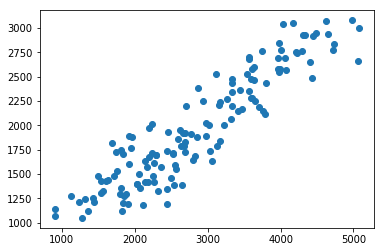

In [6]:
plt.scatter(housing['Price (00s)'], housing['SqFt'])

In [7]:
from sklearn.linear_model import LinearRegression as lr
model = lr(fit_intercept=True)
price = np.array(housing['Price (00s)'])
sqft = np.array(housing['SqFt'])
model.fit(sqft[:, np.newaxis], price)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Text(0.5,0,'Sqft')

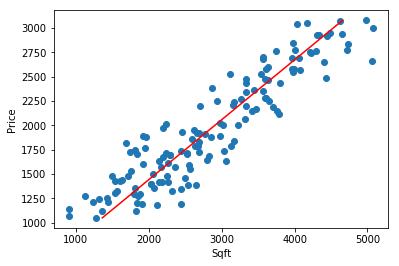

In [8]:
xfit = np.linspace(sqft.min(),sqft.max(),100)
yfit = model.predict(xfit[:,np.newaxis])
plt.scatter(price,sqft)
plt.plot(yfit,xfit, c='r')
plt.ylabel('Price')
plt.xlabel('Sqft')

In [9]:
model.predict(1500)

array([2091.67557784])

In [10]:
print(model.coef_)
print(model.intercept_)

[1.62453558]
-345.12779742913017


In [11]:
import statsmodels.api as sm
sqft = sm.add_constant(sqft)
reg = sm.OLS(price,sqft).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     761.3
Date:                Tue, 15 Jan 2019   Prob (F-statistic):           5.00e-58
Time:                        13:30:34   Log-Likelihood:                -1033.3
No. Observations:                 140   AIC:                             2071.
Df Residuals:                     138   BIC:                             2076.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -345.1278    120.627     -2.861      0.005    -583.644    -106.611
x1             1.6245      0.059     27.592      0.000       1.508       1.741
==============================================================================
Omnibus:                        0.518   Durbin-Watson:                   1.516
Prob(Omnibus):                  0.772   Jarque-Bera (JB):                0.646
Skew:                           0.022   Prob(JB):                        0.724
Kurtosis:                       2.670   Cond. No.                     7.48e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""